In [38]:
from ego_solver import EGO
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline

In [39]:
file_address = 'solution_obj_name_rosenbrock-6dim_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

In [40]:
solution = np.array(dat['solution'])
print solution.shape
solution[0,0,1].shape

(30L, 4L, 2L)


(100L,)

In [41]:

### DO NOT RUN UNLESS YOU HAVE A LONG TIME TO WAIT!


from estimate_sigma import CovarianceEstimate
all_001_trials_rosen6 = np.zeros((30,4,4))

num_ini_guess = 5
bounds = np.array([[-5, 5], [-5, 5], [-5, 5],
                   [-5, 5], [-5, 5], [-5, 5]])  # for rosenbrock-6dim
# bounds = np.array([[-3,3],[-3,3]])
# bounds = np.array([[-5, 10], [0, 15]])
# for sig_no in enumerate([0.01,0.1,1.0,10.]):
    
for trial in range(2):
    print 'now calculating trial #'+str(trial+1)
    solution_X = solution[trial,0,0] # test sigma = 0.1
    solution_y = solution[trial,0,1]
    
    ce = CovarianceEstimate(solution_X, solution_y, bounds, num_ini_guess)
    sig_scale = np.array([0.01, 0.1, 1., 10.])
#     alpha_set = np.array([0.01, 0.1, 1., 10.])
    alpha_set = np.array([1e-5, 1e-4, 1e-3, 1e-2])
    grid_result = np.zeros((sig_scale.shape[0], alpha_set.shape[0]))
    for i, s in enumerate(sig_scale):
        sig_inv = np.ones(6)*s
        for j, alpha in enumerate(alpha_set):
    #         print j
            grid_result[i,j] = ce.model.obj(sig_inv, alpha)
    all_001_trials_rosen6[trial,:,:] = grid_result[:]
    time.sleep(10)


data = all_001_trials_rosen6

# Write the array to disk
with file('all_001_trials_rosen6.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# 0.01 sig - Array shape (trial/sig/alpha): {0}\n'.format(data.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in data:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%.4e')

        # Writing out a break to indicate different slices...
        outfile.write('# New trial\n')

now calculating trial #1


ValueError: operands could not be broadcast together with shapes (100,2) (6,) 

In [44]:
sig_scale = np.array([0.01, 0.1, 1., 10.])
# alpha_set = np.array([0.01, 0.1, 1., 10.])
alpha_set = np.array([1e-5, 1e-4, 1e-3, 1e-2])
all_001_trials_rosen6 = np.loadtxt('all_001_trials_rosen6.txt').reshape((30,4,4))

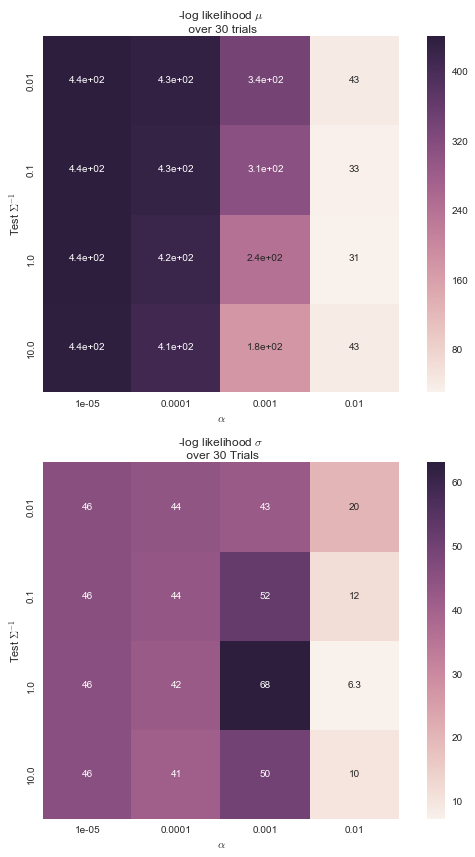

In [45]:
f, ax = plt.subplots(nrows=2, figsize=(8,12))
sns.heatmap(-all_001_trials_rosen6.mean(axis=0),
            xticklabels=alpha_set, yticklabels=sig_scale, 
           robust=True, annot=True, ax=ax[0], square=True)
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'Test $\Sigma^{-1}$')
ax[0].set_title('-log likelihood $\mu$ \n over 30 trials')

sns.heatmap(all_001_trials_rosen6.std(axis=0),
            xticklabels=alpha_set, yticklabels=sig_scale, 
           robust=True, annot=True, ax=ax[1], square=True)
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'Test $\Sigma^{-1}$')
ax[1].set_title('-log likelihood $\sigma$ \n over 30 Trials')
plt.tight_layout()
# cbar_ax = f.axes[-1]
# cbar_ax.set_ylabel('-log likelihood')
# plt.show()

In [30]:
solution.shape

(30L, 4L, 2L)

In [40]:
np.nan_to_num(-all_01_trials_branin)[:,:,:-1].mean(axis=0)

array([[ 444.46785893,  436.6947264 ,  380.85041602,  382.98939849],
       [ 444.08617516,  432.78870113,  335.03539829,   77.57730401],
       [ 443.28504248,  424.78253901,  272.7117936 ,  170.1304198 ],
       [ 443.12563043,  423.13546892,  253.5473089 ,  321.03830029]])

In [58]:
np.savetxt('all_01_trials_branin.txt', 
           all_01_trials_branin[:,:,:-1], fmt='%.4e')

ValueError: fmt has wrong number of % formats:  .4e